In [231]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.signal import find_peaks
import sys
import os
import plotly.express as px
sys.path.insert(0, r"C:\Users\fsfinardi\Documents\01_Personali\Università-2324\LabCrio\QTLab2324\PAandQubit\Actual_Work")
import Tuls

In [232]:
# Configurazioni generali
plt.rcParams['figure.figsize'] = [10, 6]  # Dimensioni della figura (larghezza, altezza)
plt.rcParams['figure.dpi'] = 100  # Risoluzione della figura in DPI

# Stile delle linee
plt.rcParams['lines.linewidth'] = 2  # Larghezza delle linee
plt.rcParams['lines.markersize'] = 6  # Dimensione dei marker

# Font e testo
plt.rcParams['font.size'] = 14  # Dimensione del font
plt.rcParams['font.family'] = 'sans-serif'  # Famiglia del font
plt.rcParams['font.sans-serif'] = ['Arial']  # Specifica dei font sans-serif
plt.rcParams['axes.titlesize'] = 18  # Dimensione del titolo degli assi
plt.rcParams['axes.labelsize'] = 14  # Dimensione delle etichette degli assi
plt.rcParams['axes.grid'] = True  # Abilitare la griglia sugli assi

# Griglia
plt.rcParams['grid.color'] = 'gray'  # Colore della griglia
plt.rcParams['grid.linestyle'] = '--'  # Stile della griglia (trattini)
plt.rcParams['grid.linewidth'] = 0.5  # Larghezza della griglia

# Colori
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.Set2.colors)  # Ciclo dei colori per le linee

# Stile delle legende
plt.rcParams['legend.fontsize'] = 15  # Dimensione del font della legenda
plt.rcParams['legend.loc'] = 'best'  # Posizione della legenda

# Bordo delle figure
plt.rcParams['axes.edgecolor'] = 'black'  # Colore del bordo degli assi
plt.rcParams['axes.linewidth'] = 1  # Larghezza del bordo degli assi

# Margini dei grafici
plt.rcParams['axes.titlepad'] = 20  # Distanza del titolo degli assi
plt.rcParams['axes.labelpad'] = 10  # Distanza delle etichette degli assi

# Salvataggio delle figure
plt.rcParams['savefig.dpi'] = 300  # DPI per il salvataggio delle figure
plt.rcParams['savefig.format'] = 'png'  # Formato di salvataggio predefinito
plt.rcParams['savefig.bbox'] = 'tight'  # Bounding box per il salvataggio
plt.rcParams['savefig.pad_inches'] = 0.1  # Padding intorno alla figura salvata

# Titoli e Etichette degli assi
plt.rcParams['axes.titleweight'] = 'bold'  # Peso del titolo degli assi
plt.rcParams['axes.labelweight'] = 'bold'  # Peso delle etichette degli assi


In [233]:
def file_dir(directory_path):
	# Ottieni la lista di tutti i file e le cartelle nella directory
	entries = os.listdir(directory_path)

	# Crea due liste separate per file e cartelle
	file_list = []
	folder_list = []

	for entry in entries:
		full_path = os.path.join(directory_path, entry)
		if os.path.isfile(full_path):
			file_list.append(entry)
		elif os.path.isdir(full_path):
			folder_list.append(entry)

	# Stampa i titoli dei file
	print("File:")
	for file_name in file_list:
		print(file_name)

	# Stampa i titoli delle cartelle
	print("\nCartelle:")
	for folder_name in folder_list:
		print(folder_name)

dir_path = r"C:\Users\fsfinardi\Desktop\AhBiPPBiPP"
file_dir(dir_path)

File:
fitting.ipynb

Cartelle:
punchout
q_spec
resonator
starkshift


# Resonator spectroscopy

In [234]:
new_dir_path = dir_path+r"\resonator"
file_dir(new_dir_path)

File:
Hunting_resonances.hdf5
Ris_grande_right_highpower-20dbm.h5
Ris_piccola_left_highpower-20dBm.hdf5
Ris_piccola_left_lowpower-50dBm.h5
Ris_right_grande_lowpower-50dBm.h5

Cartelle:


In [235]:
# resonator spectroscopy
d0_hunting_resonances = Tuls.load_hdf5_to_dict(hdf5_file = new_dir_path+r'\Hunting_resonances.hdf5')
d1_left_high = Tuls.load_hdf5_to_dict(hdf5_file = new_dir_path+r'\Ris_piccola_left_highpower-20dBm.hdf5')
d2_left_low = Tuls.load_hdf5_to_dict(hdf5_file = new_dir_path+r'\Ris_piccola_left_lowpower-50dBm.h5')
d3_right_high = Tuls.load_hdf5_to_dict(hdf5_file = new_dir_path+r'\Ris_grande_right_highpower-20dbm.h5')
d4_right_low = Tuls.load_hdf5_to_dict(hdf5_file = new_dir_path+r'\Ris_right_grande_lowpower-50dBm.h5')

In [236]:
def loren_fit(x, y, initial_guess):
	# Definisci la funzione lorenziana
	def lorentzian(x, A, x0, gamma, offset, a, b, c):
		loren = A * gamma**2 / ((x - x0)**2 + gamma**2) + offset 
		correction = a * (x - x0)**2 + b * (x - x0) + c
		return loren + correction

	popt, pcov = curve_fit(lorentzian, x, y, p0 = initial_guess)

	# Ottieni i parametri ottimali
	A_opt, x0_opt, gamma_opt, offset_opt, a_opt, b_opt, c_opt  = popt

	# Stampa i risultati del fit
	print(f"Parametri ottimali:\nA\t= {A_opt},\nx0\t= {x0_opt},\ngamma\t= {gamma_opt},\noffset\t= {offset_opt},\na\t= {a_opt},\nb\t= {b_opt},\nc\t= {c_opt}")

	# Genera dati fitted usando i parametri ottimali
	y_fitted = lorentzian(x, *popt)

	return (x, y_fitted, popt)

	# # Visualizza i dati originali e il fit
	# plt.figure(figsize=(10, 6))
	# plt.plot(x, y, label='Dati con rumore', s = 5)
	# plt.plot(x, y_fitted, label='Fit lorenziano', color = 'orange')
	# plt.xlabel('x')
	# plt.ylabel('y')
	# plt.legend()
	# plt.show()

In [237]:
# I = d0_hunting_resonances['I']
# Q = d0_hunting_resonances['Q']
# f = d0_hunting_resonances['f']

# mgn = np.sqrt(I**2 + Q**2)

# plt.figure()
# plt.title('Hunting_resonances.hdf5')
# plt.plot(f, mgn)
# plt.show()

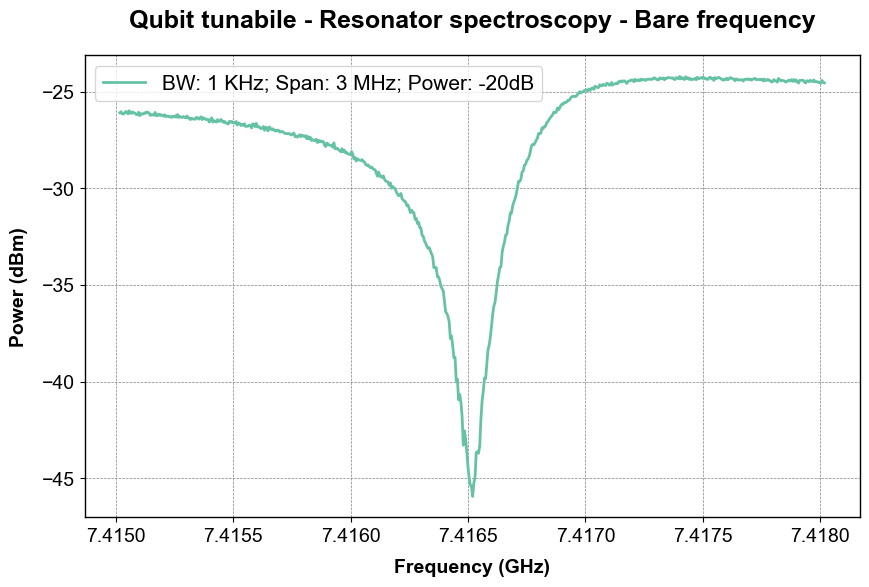

In [238]:
I1 = d1_left_high['I']
Q1 = d1_left_high['Q']
f1 = d1_left_high['f']


mgn1 = np.sqrt(I1**2 + Q1**2)
dBm1 = Tuls.mVpp_to_dBm(mgn1 * 1e3)

plt.figure()
plt.title('Qubit tunabile - Resonator spectroscopy - Bare frequency')
plt.plot(f1, dBm1, label = 'BW: 1 KHz; Span: 3 MHz; Power: -20dB')
plt.xlabel('Frequency (GHz)')
plt.ylabel('Power (dBm)')
plt.legend()
plt.show()

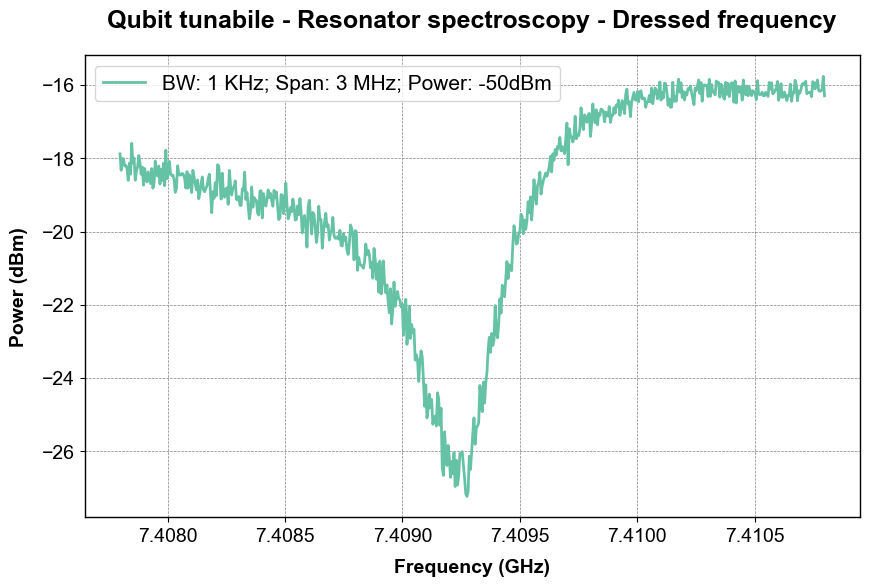

In [239]:
I2 = d2_left_low['I']
Q2 = d2_left_low['Q']
f2 = d2_left_low['f']

mgn2 = np.sqrt(I2**2 + Q2**2)
dBm2 = Tuls.mVpp_to_dBm(mgn2 * 1e3)


plt.figure()
plt.title('Qubit tunabile - Resonator spectroscopy - Dressed frequency')
plt.plot(f2, dBm2, label = 'BW: 1 KHz; Span: 3 MHz; Power: -50dBm')
plt.xlabel('Frequency (GHz)')
plt.ylabel('Power (dBm)')
plt.legend()
plt.show()

Parametri ottimali:
A	= -17.164439891190806,
x0	= 7.5745584909159644,
gamma	= 0.00040288329178434943,
offset	= -6254321.447398864,
a	= 35667.64534880704,
b	= -18.654446341680487,
c	= 6254305.622424138


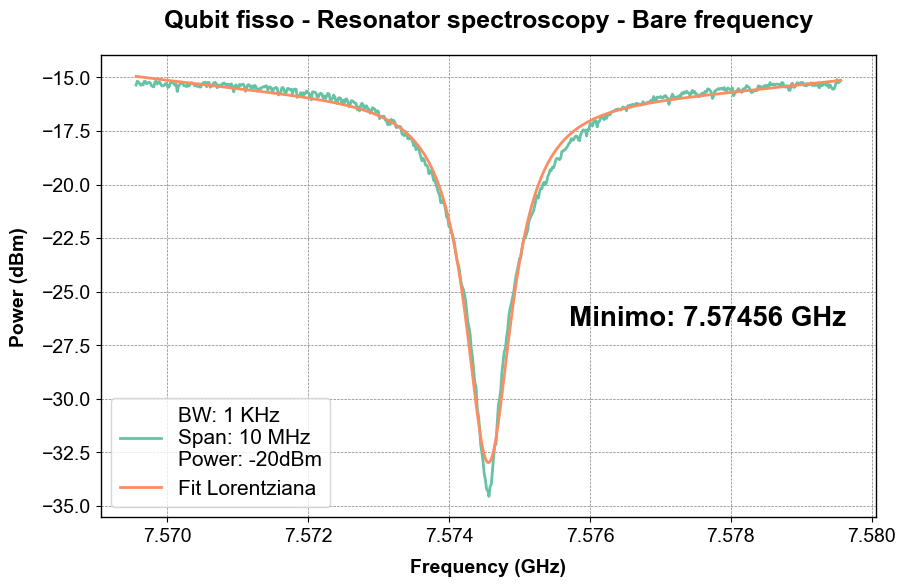

In [240]:
I3 = d3_right_high['I']
Q3 = d3_right_high['Q']
f3 = d3_right_high['f']

mgn3 = np.sqrt(I3**2 + Q3**2)
dBm3 = Tuls.mVpp_to_dBm(mgn3 * 1e3)

y_peak = np.min(dBm3)
x_peak = f3[np.argmin(dBm3)]
offset = np.max(dBm3)

initial_guess = [y_peak, x_peak, 0.0002, offset, 0, 0, 0] # a, x0, gamma

x3, y3, pars = loren_fit(f3, dBm3, initial_guess)

plt.figure()
plt.title('Qubit fisso - Resonator spectroscopy - Bare frequency')
plt.plot(f3, dBm3, label = 'BW: 1 KHz \nSpan: 10 MHz \nPower: -20dBm')
plt.plot(f3, y3, label = 'Fit Lorentziana')
plt.text(7.5757, -26.6, f'Minimo: {np.round(pars[1],5)} GHz', fontsize = 20, weight = 'bold')
plt.xlabel('Frequency (GHz)')
plt.ylabel('Power (dBm)')
plt.legend()
plt.show()

Parametri ottimali:
A	= -12.04617172168064,
x0	= 7.579016730604578,
gamma	= -0.000697812371325171,
offset	= -2642846.108642879,
a	= 11647.075484462586,
b	= 33.99396737119502,
c	= 2642830.7651203396


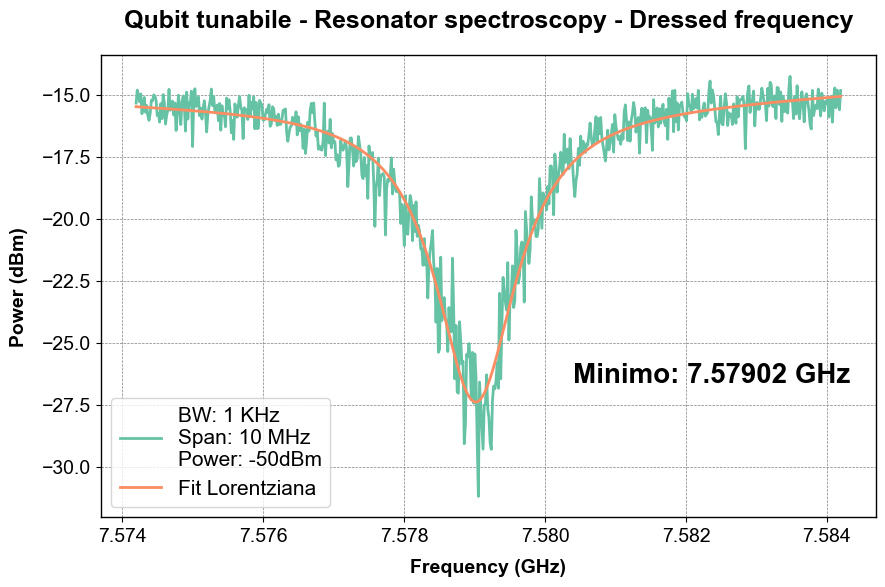

In [241]:
I4 = d4_right_low['I']
Q4 = d4_right_low['Q']
f4 = d4_right_low['f']

mgn4 = np.sqrt(I4**2 + Q4**2)
dBm4 = Tuls.mVpp_to_dBm(mgn4 * 1e3)

y_peak = np.min(dBm4)
x_peak = f4[np.argmin(dBm4)]
offset = np.max(dBm4)

initial_guess = [y_peak, x_peak, 0.002, offset, 0, 0, 0] # a, x0, gamma

x4, y4, pars = loren_fit(f4, dBm4, initial_guess)

plt.figure()
plt.title('Qubit tunabile - Resonator spectroscopy - Dressed frequency')
plt.plot(f4, dBm4, label = 'BW: 1 KHz \nSpan: 10 MHz \nPower: -50dBm')
plt.plot(f4, y4, label = 'Fit Lorentziana')
plt.text(7.5804, -26.6, f'Minimo: {np.round(pars[1],5)} GHz', fontsize = 20, weight = 'bold')
plt.xlabel('Frequency (GHz)')
plt.ylabel('Power (dBm)')
plt.legend()
plt.show()

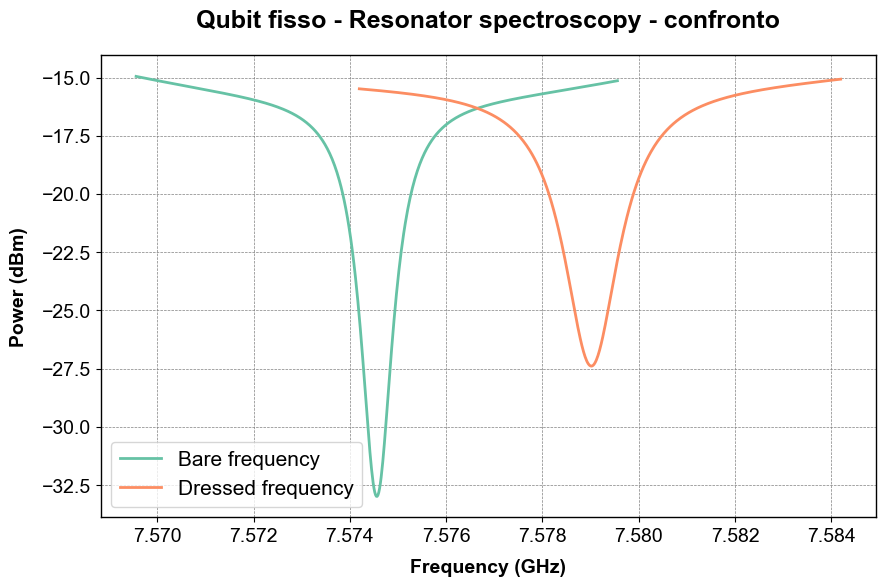

In [242]:


plt.figure()
plt.title('Qubit fisso - Resonator spectroscopy - confronto')
plt.plot(f3, y3, label = 'Bare frequency', linewidth = 2)
plt.plot(f4, y4, label = 'Dressed frequency', linewidth = 2)
plt.xlabel('Frequency (GHz)')
plt.ylabel('Power (dBm)')
plt.legend()
plt.show()

# Punchout

In [243]:
new_dir_path = dir_path+r"\punchout"
file_dir(new_dir_path)

File:
FIRSTREALPUNCHOUT_att10dBm_rightpeak.h5
FIRSTREALPUNCHOUT_att5dBm_rightpeak.h5
longPUNCHOUT_att10dBm_rightpeak.png
long_PUNCHOUT_att10dBm_rightpeak.h5

Cartelle:


In [244]:
d1_p5 = Tuls.load_hdf5_to_dict(hdf5_file = new_dir_path+r'\FIRSTREALPUNCHOUT_att5dBm_rightpeak.h5')
d2_p10 = Tuls.load_hdf5_to_dict(hdf5_file = new_dir_path+r'\FIRSTREALPUNCHOUT_att10dBm_rightpeak.h5')
d3_p10_long = Tuls.load_hdf5_to_dict(hdf5_file = new_dir_path+r'\long_PUNCHOUT_att10dBm_rightpeak.h5')

In [245]:
dota = d3_p10_long
sorted = []

for i in range(len(dota.keys())):
    sorted.append(f'Sweep_{i}')



power = []
ampls = []

for i in sorted:
    power.append(dota[i]['Power'])
    I = Tuls.find_key(dota[i], 'I')
    Q = Tuls.find_key(dota[i], 'Q')
    amp = 10*np.log10(I**2 + Q**2)
    #amp = amp/np.min(amp)
    ampls.append(amp)

ampls = np.array(ampls)[1:]
power = np.array(power)[1:]-10
f = Tuls.find_key(dota, 'f')

fig = px.imshow(ampls, aspect="auto", labels=dict(x='Frequency (GHz)', y='Power (dBm impostati sul VNA, ricordati di atten)', z='MSR'), x=f, y=power, origin='lower')

fig.update_layout(
    title=dict(
        text='<b>One-tone spectroscopy - "punchout"</b>',
        font=dict(size=30, family='Arial'),
        x=0.5,  # Centra il titolo
        xanchor='center'  # Allinea il titolo orizzontalmente
    ),
    xaxis=dict(
        title=dict(
            text='<b>Frequency (GHz)</b>',  # Usare HTML per il grassetto
            font=dict(size=22, family='Arial')
        ),
        title_font=dict(size=22, family='Arial'),  # Solo dimensione e famiglia
        tickvals=f[::int(len(f)/10)],
        tickformat='.3f',
        tickangle=30
    ),
    yaxis=dict(
        title=dict(
            text='<b>VNA power (dBm)</b>',  # Usare HTML per il grassetto
            font=dict(size=22, family='Arial')
        ),
        title_font=dict(size=22, family='Arial')  # Solo dimensione e famiglia
    ),
    coloraxis_colorbar=dict(
        title='MSR',
        tickfont=dict(size=18, family='Arial'),
        title_font=dict(size=18, family='Arial')  # Solo dimensione e famiglia
    ),
    width=1000,
    height=600,
    font=dict(size=18, family='Arial'),
    paper_bgcolor='white',
    plot_bgcolor='white',
    margin=dict(l=50, r=50, t=50, b=50)
)

fig.update_traces(
    hovertemplate='Frequency: %{x}<br>Amplitude: %{y}<br>MSR: %{z}',
    colorbar=dict(
        title='MSR',
        tickfont=dict(size=18, family='Arial'),
        title_font=dict(size=18, family='Arial')
    ),
    hoverongaps=False,
    colorscale='magma'
)

fig.update_xaxes(
    showgrid=True,
    gridcolor='gray',
    gridwidth=0.5,
    griddash='dash'
)

fig.update_yaxes(
    showgrid=True,
    gridcolor='gray',
    gridwidth=0.5,
    griddash='dash'
)

fig.show()

# Qubit spectroscopy

In [246]:
new_dir_path = dir_path+r"\q_spec"
file_dir(new_dir_path)

File:
Q_spec.ipynb
q_spec_200624_(-10dBm+att).h5
q_spec_200624_(-20dBm+att).h5
q_spec_200624_(-30dBm+att).h5
q_spec_200624_(-40dBm+att).h5
Q_spec_punchout.ipynb

Cartelle:


In [247]:
d1_q10 = Tuls.load_hdf5_to_dict(hdf5_file = new_dir_path+r'\q_spec_200624_(-10dBm+att).h5')
d2_q20 = Tuls.load_hdf5_to_dict(hdf5_file = new_dir_path+r'\q_spec_200624_(-20dBm+att).h5')
d3_q30 = Tuls.load_hdf5_to_dict(hdf5_file = new_dir_path+r'\q_spec_200624_(-30dBm+att).h5')
d4_q40 = Tuls.load_hdf5_to_dict(hdf5_file = new_dir_path+r'\q_spec_200624_(-40dBm+att).h5')

In [248]:
f = d4_q40['f_range']*1e-9
sweep1 = d1_q10['q_spec']
sweep2 = d2_q20['q_spec']
sweep3 = d3_q30['q_spec']
sweep4 = d4_q40['q_spec']

def gauss(x, a, x0, sigma, offset):
    return a * np.exp(-(x - x0)**2 / (2 * sigma**2)) + offset

def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

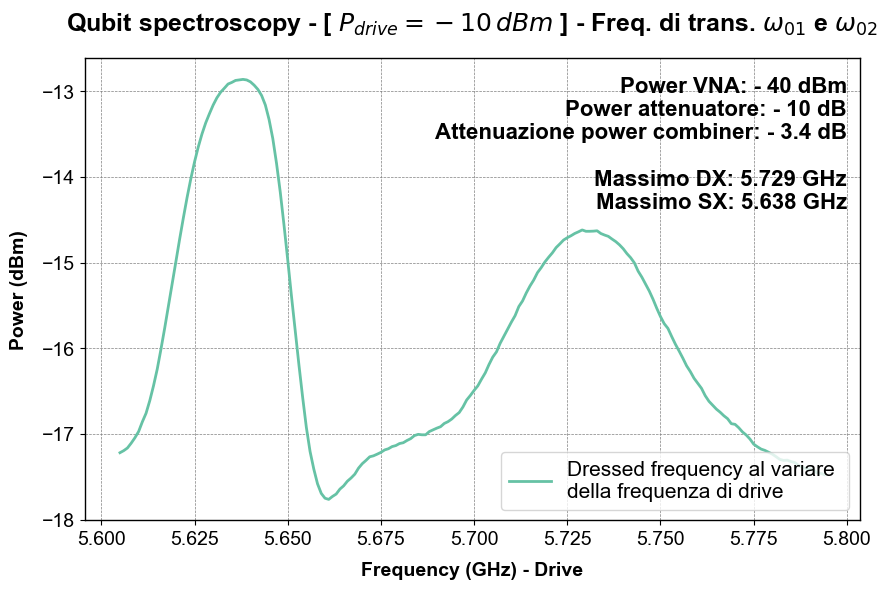

In [249]:
N = 11
p = int((N-1)/2)
s1_avg = moving_average(sweep1, N)
peak1_sx = f[p:-p][find_peaks(s1_avg, prominence = 1)[0]][0]
peak1_rx = f[p:-p][find_peaks(s1_avg, prominence = 1)[0]][1]

print()

plt.figure()
plt.title(r'Qubit spectroscopy - [ $P_{drive} = -10\,dBm$ ] - Freq. di trans. $\omega_{01}$ e $\omega_{02}$')
plt.plot(f[p:-p], s1_avg, label = 'Dressed frequency al variare \ndella frequenza di drive')
plt.text(5.8, -14.37, f'Power VNA: - 40 dBm\nPower attenuatore: - 10 dB\nAttenuazione power combiner: - 3.4 dB\n\nMassimo DX: {np.round(peak1_rx, 5)} GHz\nMassimo SX: {np.round(peak1_sx, 5)} GHz', fontsize = 16, weight = 'bold', ha = 'right')
plt.xlabel('Frequency (GHz) - Drive')
plt.ylabel('Power (dBm)')
plt.legend(loc = 4)
plt.show()

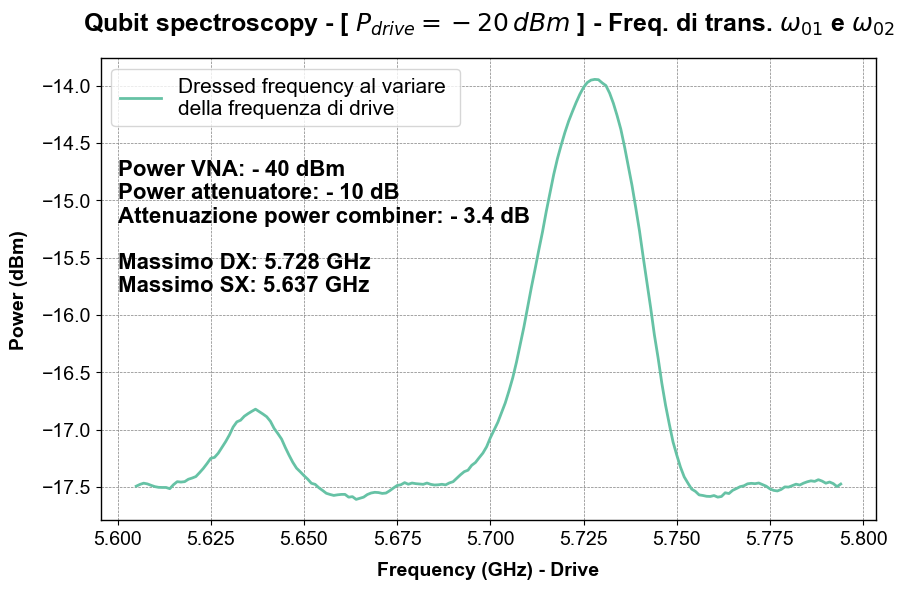

In [256]:
N = 11
p = int((N-1)/2)
s2_avg = moving_average(sweep2, N)
peak2_rx = f[p:-p][find_peaks(s2_avg, prominence = 0.5)[0]][1]
peak2_sx = f[p:-p][find_peaks(s2_avg, prominence = 0.5)[0]][0]

plt.figure()
plt.title(r'Qubit spectroscopy - [ $P_{drive} = -20\,dBm$ ] - Freq. di trans. $\omega_{01}$ e $\omega_{02}$')
plt.plot(f[p:-p], s2_avg, label = 'Dressed frequency al variare \ndella frequenza di drive')
plt.text(5.6, -15.8, f'Power VNA: - 40 dBm\nPower attenuatore: - 10 dB\nAttenuazione power combiner: - 3.4 dB\n\nMassimo DX: {np.round(peak2_rx, 5)} GHz\nMassimo SX: {np.round(peak2_sx, 5)} GHz', fontsize = 16, weight = 'bold')
plt.xlabel('Frequency (GHz) - Drive')
plt.ylabel('Power (dBm)')
plt.legend(loc = 2)
plt.show()

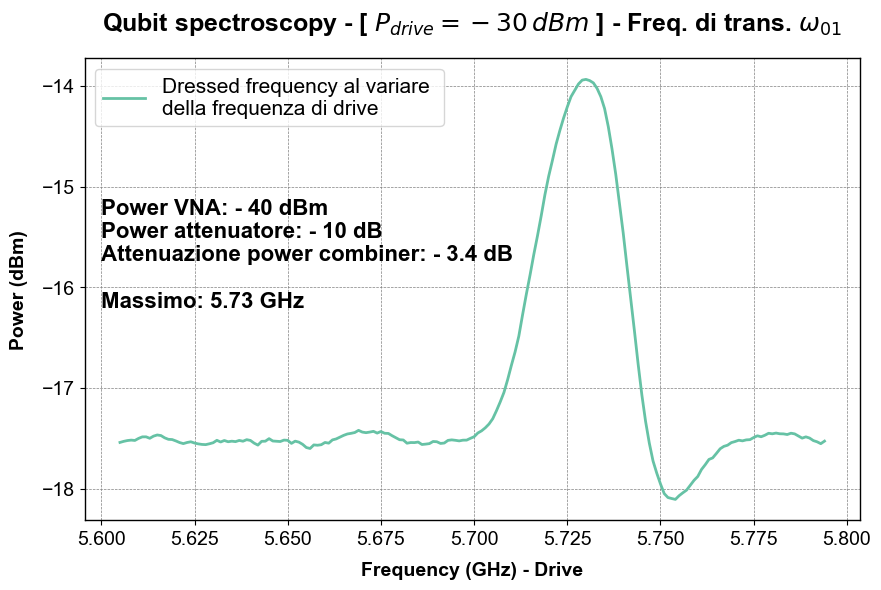

In [258]:
N = 11
p = int((N-1)/2)
s3_avg = moving_average(sweep3, N)
peak3 = f[p:-p][find_peaks(s3_avg, prominence = 1)[0]][0]

plt.figure()
plt.title(r'Qubit spectroscopy - [ $P_{drive} = -30\,dBm$ ] - Freq. di trans. $\omega_{01}$')
plt.plot(f[p:-p], s3_avg, label = 'Dressed frequency al variare \ndella frequenza di drive')
plt.text(5.6, -16.2, f'Power VNA: - 40 dBm\nPower attenuatore: - 10 dB\nAttenuazione power combiner: - 3.4 dB\n\nMassimo: {np.round(peak3, 5)} GHz', fontsize = 16, weight = 'bold')
plt.xlabel('Frequency (GHz) - Drive')
plt.ylabel('Power (dBm)')
plt.legend(loc = 2)
plt.show()

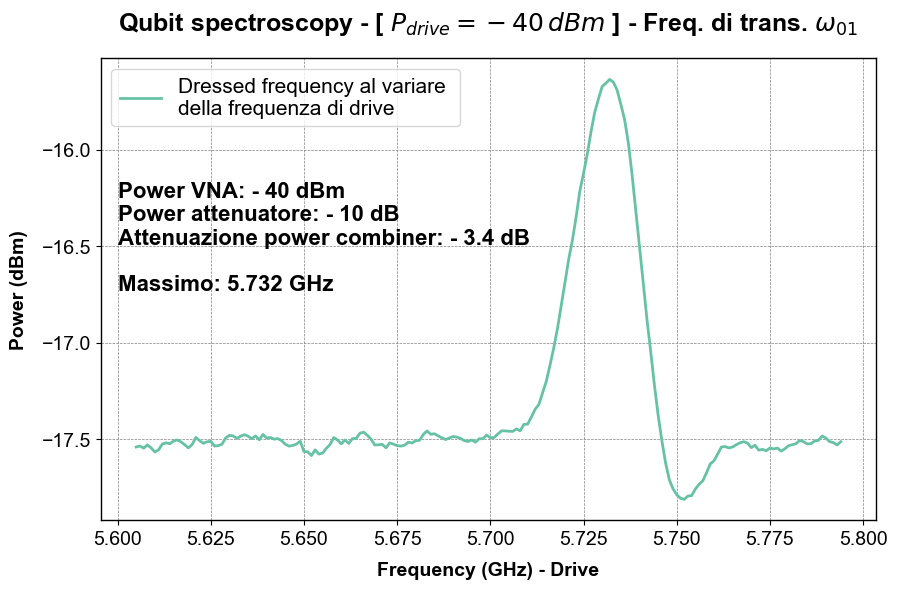

In [259]:
# y_peak = np.max(sweep4)
# x_peak = f[np.argmin(sweep4)]
# offset = np.min(sweep4)

# initial_guess = [y_peak, x_peak, 0.02 * 2.35, offset]

# params, params_covariance = curve_fit(gauss, f, sweep4, p0=initial_guess)
# y = gauss(f, params[0], params[1], params[2], params[3])
N = 11
p = int((N-1)/2)
s4_avg = moving_average(sweep4, N)
peak4 = f[p:-p][find_peaks(s4_avg, prominence = 1)[0]][0]

plt.figure()
plt.title(r'Qubit spectroscopy - [ $P_{drive} = -40\,dBm$ ] - Freq. di trans. $\omega_{01}$')
plt.plot(f[p:-p], s4_avg, label = 'Dressed frequency al variare \ndella frequenza di drive')
plt.text(5.6, -16.73, f'Power VNA: - 40 dBm\nPower attenuatore: - 10 dB\nAttenuazione power combiner: - 3.4 dB\n\nMassimo: {np.round(peak4, 5)} GHz', fontsize = 16, weight = 'bold')
plt.xlabel('Frequency (GHz) - Drive')
plt.ylabel('Power (dBm)')
plt.legend(loc = 2)
plt.show()

# Stark Shift

In [260]:
new_dir_path = dir_path+r"\starkshift"
file_dir(new_dir_path)

File:
Q_spec_Stark_shift.ipynb

Cartelle:


In [ ]:
d1_stark = Tuls.load_hdf5_to_dict(hdf5_file = new_dir_path+r'\Hunting_resonances.hdf5')